In [ ]:
# احمد محمد امين علي
# 210101074

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

In [2]:
class SVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = 0  # Initialize bias term to 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = np.where(y <= 0, -1, 1)  # Ensure labels are in {-1, 1}

        # Initialize weight vector and bias
        self.w = np.zeros(n_features)

        # Store the hinge loss at each iteration
        self.hinge_loss_history = []

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) + self.b) # y(w*x + b)

                # Subgradient update
                # Since when condition = 1, is not differentiable, we take the subgradient which turns out to be [0, -yixi] for w and [0, -yi] for b
                if condition >= 1:
                    # Update with regularization term only (no hinge loss component)
                    self.w -= self.lr * (2 * self.lambda_param * self.w) # Because gradient is 0
                else:
                    # Update with hinge loss and regularization term
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b += self.lr * y[idx]  # Update bias when condition is violated

            # Calculate and store the hinge loss after each iteration
            hinge_loss = self.calculate_hinge_loss(X, y)
            self.hinge_loss_history.append(hinge_loss)

    def calculate_hinge_loss(self, X, y):
        n_samples = X.shape[0] # Number of rows
        distances = 1 - y * (np.dot(X, self.w) + self.b)
        hinge_loss = np.maximum(0, distances)  # Hinge loss for each sample
        return np.mean(hinge_loss) + self.lambda_param * np.sum(self.w ** 2)  # Regularization term

    def predict(self, X):
        # Use sign function to determine class labels
        linear_output = np.dot(X, self.w) + self.b
        return np.sign(linear_output)

    def accuracy(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy


In [3]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=0)
X.shape

(1000, 2)

In [4]:
y = np.where(y == 0, -1, 1)  # Convert labels to {-1, 1}

In [5]:
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'lambda_param': [0.001, 0.01, 0.1],
    'n_iters': [10, 100, 500, 1000]
}

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

best_params = None
best_score = 0

# Define your parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'lambda_param': [0.001, 0.01, 0.1],
    'n_iters': [10, 100, 1000]
}

for params in ParameterGrid(param_grid):
    # Initialize the SVM with current hyperparameters
    svm = SVM(
        learning_rate=params['learning_rate'],
        lambda_param=params['lambda_param'],
        n_iters=params['n_iters']
    )
    
    # Train the SVM on the training set
    svm.fit(X_train, y_train)
    
    # Predict on the test set
    predictions = svm.predict(X_test)
    
    # Evaluate accuracy on the test set
    score = accuracy_score(y_test, predictions)
    
    # Update best parameters if the current score is better
    if score > best_score:
        best_score = score
        best_params = params


In [7]:
print(best_params)

{'lambda_param': 0.001, 'learning_rate': 0.01, 'n_iters': 10}


In [8]:
svm = SVM(learning_rate=best_params['learning_rate'], lambda_param=best_params['lambda_param'], n_iters=best_params['n_iters'])
svm.fit(X, y)

In [9]:
# Print final hinge loss
final_hinge_loss = svm.calculate_hinge_loss(X, y)
print(f"Final Hinge Loss: {final_hinge_loss}")

Final Hinge Loss: 0.21842498077958092


In [10]:
# Check accuracy
accuracy = svm.accuracy(X, y)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.00%


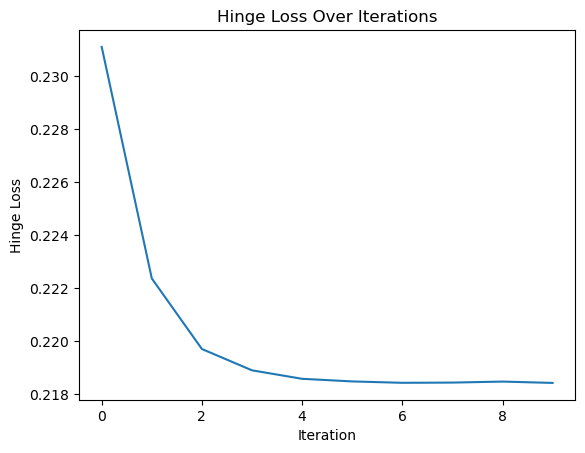

In [11]:
# Plot hinge loss over iterations
plt.plot(svm.hinge_loss_history)
plt.title("Hinge Loss Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Hinge Loss")
plt.show()

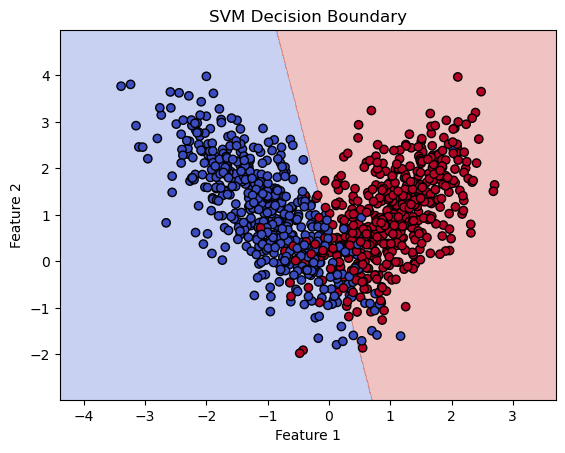

In [12]:
# Define the mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the mesh grid
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()